# 수정사항

층을 하나 더 늘렸습니다.

In [47]:
# 데이터 불러오기
import pandas as pd
train = pd.read_csv('../Data/orb_data/train.csv', index_col=0)
test = pd.read_csv('../Data/orb_data/test.csv', index_col=0)
sample_submission = pd.read_csv('../Data/orb_data/sample_submission.csv', index_col=0)

In [48]:
import numpy as np

x = train.copy() 

down_quantiles = x.quantile(0.0002)
up_quantiles = x.quantile(0.9998)

outliers_low = (x < down_quantiles)

outliers_high = (x > up_quantiles)

x[outliers_low] = np.nan
x = x.dropna()

x[outliers_high] = np.nan
x = x.dropna()

train = x

In [49]:
# Train 데이터의 타입을 Sample_submission에 대응하는 가변수 형태로 변환
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x : to_number(x, column_number))

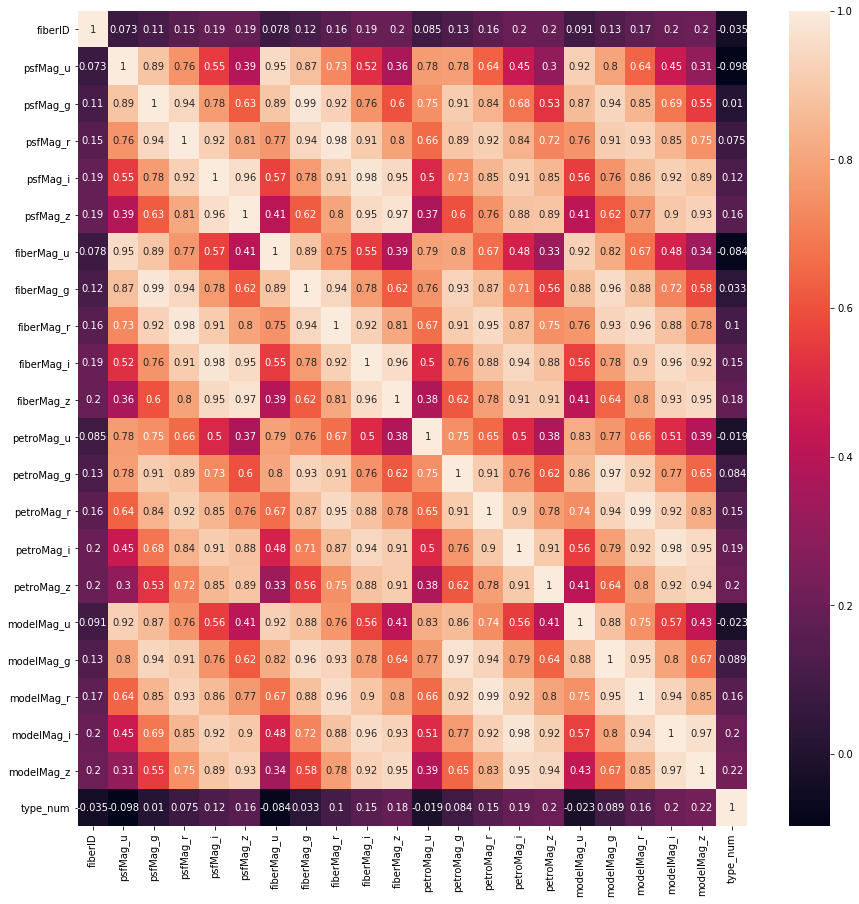

In [50]:
# 상관관계 파악을 위한 히트맵 그리기
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(data=train.corr(), annot=True)
plt.show()

In [51]:
# 모델에 적용할 데이터 셋 준비 
train_x = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test # (10009, 20)

In [52]:
# FiberID 행 지우기
del train_x['fiberID']
del test_x['fiberID']

In [53]:
train_x.describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000
mean,20.979823,19.856575,19.283264,18.868866,18.609416,21.169836,20.088536,19.503972,19.086437,18.827770,20.706869,19.597136,19.006182,18.603221,18.391133,20.726958,19.527082,18.937278,18.518135,18.273653
std,2.067406,1.847352,1.692677,1.613026,1.671411,1.956920,1.831601,1.697707,1.620263,1.670219,2.422042,2.035232,1.902059,1.849755,1.995317,2.174131,1.947374,1.850234,1.786515,1.853845
min,7.900287,14.100453,12.794292,14.181015,12.997802,9.283217,13.268417,14.607630,14.564564,13.834731,-50.847000,-7.370070,-6.002004,6.260908,-7.276001,14.809196,13.671926,13.020510,12.603077,12.165089
25%,19.652008,18.701118,18.048531,17.747212,17.425149,19.941499,18.903997,18.260118,17.905040,17.607257,19.248508,18.114771,17.481697,17.052253,16.805815,19.265526,18.075517,17.423527,16.977867,16.705179
50%,20.868009,19.901808,19.452638,19.041419,18.608369,21.047364,20.068337,19.631813,19.189509,18.710445,20.365245,19.583750,19.182291,18.693264,18.172099,20.403206,19.543906,19.141585,18.640156,18.098112
75%,22.152519,21.143191,20.510942,20.070588,19.880933,22.333611,21.382953,20.772727,20.331307,20.132881,21.790701,20.998175,20.454079,20.016564,19.804433,21.984025,20.956657,20.405119,19.966302,19.816728
max,33.499325,28.844500,27.668891,27.168486,25.997083,31.516250,26.908828,26.269446,24.869431,24.792699,65.815133,43.328306,38.846081,35.969973,48.497613,30.413988,27.235230,26.584792,25.893193,25.326723


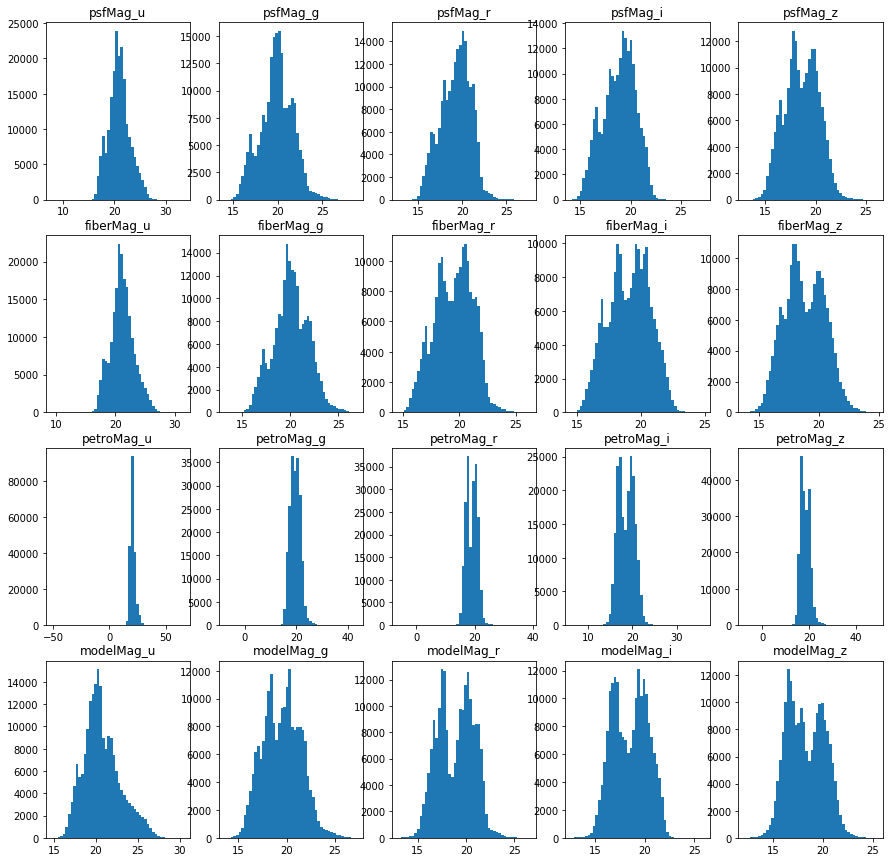

In [54]:
# 그래프 그리기
plt.figure(figsize=(15,15))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.hist(train_x.iloc[:,i], bins=50)
    plt.gca().set_title(train_x.columns[i])

In [55]:
test_x.describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,20.987400,19.878440,19.280218,18.873165,18.618385,21.184506,20.091376,19.497732,19.083329,18.826624,20.715429,19.462021,18.995001,18.616519,18.411996,20.739001,19.534844,18.935095,18.522308,18.281069
std,2.111703,2.573890,1.709344,1.720713,1.702236,1.990940,1.865064,1.710070,1.633953,1.711790,2.807434,13.971203,1.979225,1.970463,2.373022,2.187025,1.957506,1.856617,1.796820,1.867582
min,-7.248195,-42.663871,9.134712,-22.522266,13.349827,9.390439,8.188752,12.288183,12.688984,-8.455932,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,19.655525,18.671025,18.037847,17.742016,17.424701,19.940430,18.892043,18.253627,17.905253,17.610776,19.249432,18.104265,17.475078,17.043615,16.805557,19.268471,18.064625,17.424393,16.971911,16.715685
50%,20.854404,19.910333,19.444925,19.033283,18.594713,21.040735,20.071658,19.627904,19.180605,18.699819,20.371014,19.582955,19.197068,18.684269,18.171966,20.412702,19.541261,19.155839,18.635195,18.095883
75%,22.160801,21.150040,20.489912,20.083814,19.878652,22.339213,21.402558,20.756306,20.331848,20.119736,21.803705,21.025719,20.428279,20.015701,19.815916,21.992969,20.981396,20.389215,19.970657,19.823902
max,37.681143,182.654452,31.883768,47.227391,34.946057,41.169991,47.160580,29.266687,31.146742,26.478564,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


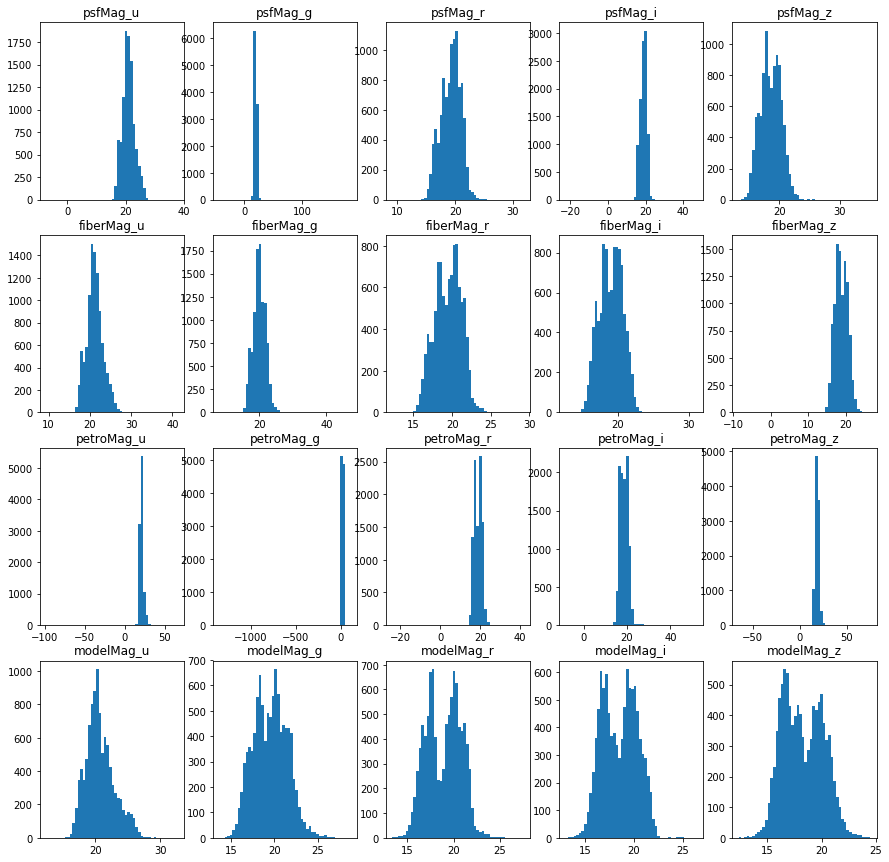

In [56]:
# 그래프 그리기
plt.figure(figsize=(15,15))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.hist(test_x.iloc[:,i], bins=50)
    plt.gca().set_title(test_x.columns[i])

In [57]:
# 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.05,  shuffle=True, random_state=0)

# One-Hot Encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [58]:
# 데이터 스케일
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test_x = scaler.transform(test_x)

In [59]:
# gelu activation function -  Gaussian Error Linear Units (GELUs)
# https://arxiv.org/abs/1606.08415

import numpy as np
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
import tensorflow as tf
class Gelu(Activation):
    def __init__(self, activation, **kwargs):
        super(Gelu, self).__init__(activation, **kwargs)
        self.__name__='gelu'
        
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

get_custom_objects().update({'gelu': Gelu(gelu)})

In [60]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation

model = Sequential()
model.add(Dense(128, input_shape=(20,)))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.18))
model.add(Dense(128))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.18))
model.add(Dense(128))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.18))
model.add(Dense(128))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.18))
model.add(Dense(128))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.18))
model.add(Dense(128))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.18))
model.add(Dense(19, activation='softmax'))

In [61]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               2688      
_________________________________________________________________
activation_13 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_14 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

In [62]:
!pip install tensorflow-gpu==1.14.0 --user

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [63]:
from keras.utils import multi_gpu_model

model = multi_gpu_model(model, gpus=4, cpu_merge=False)

In [64]:
# 조기 종료
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1000)

In [65]:
# 컴파일
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Adam optimizer default: keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
# 훈련
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10000, batch_size=256, callbacks=[early_stopping]) # epochs number changeable

Train on 151487 samples, validate on 37872 samples
Epoch 1/10000
151487/151487 [==============================] - 8s 53us/step - loss: 0.8155 - accuracy: 0.7430 - val_loss: 0.5175 - val_accuracy: 0.8282
Epoch 2/10000
151487/151487 [==============================] - 6s 39us/step - loss: 0.5630 - accuracy: 0.8126 - val_loss: 0.4738 - val_accuracy: 0.8442
Epoch 3/10000
151487/151487 [==============================] - 6s 38us/step - loss: 0.5261 - accuracy: 0.8231 - val_loss: 0.4535 - val_accuracy: 0.8447
Epoch 4/10000
151487/151487 [==============================] - 6s 38us/step - loss: 0.5034 - accuracy: 0.8292 - val_loss: 0.4508 - val_accuracy: 0.8453
Epoch 5/10000
151487/151487 [==============================] - 6s 38us/step - loss: 0.4926 - accuracy: 0.8328 - val_loss: 0.4343 - val_accuracy: 0.8502
Epoch 6/10000
151487/151487 [==============================] - 6s 39us/step - loss: 0.4837 - accuracy: 0.8347 - val_loss: 0.4309 - val_accuracy: 0.8494
Epoch 7/10000
151487/151487 [========

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# 평가예측
loss, accuracy = model.evaluate(X_test, y_test, batch_size=256)
print('loss: ', loss)
print('accuracy: ', accuracy)

In [ ]:
# Evaluating in optimal parameter
y_pred = model.predict(test_x)
print(y_pred)

In [ ]:
# 제출 파일 생성
submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('./Submission/submission20_gpu.csv', index=True)

제출 결과: 

# 결과 분석 